## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Load Dataset

In [ ]:
data = pd.read_csv('/content/churn2.csv')
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


In [ ]:
data.isna().sum()

,0
customerID,9
Gender,16
SeniorCitizen,12
Partner,16
Dependents,19
Tenure,17
Contract,13
PaperlessBilling,13
PaymentMethod,11
MonthlyCharges,10


In [ ]:
data.duplicated().sum()

14

## Data Cleaning

In [ ]:
# Drop null value
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6911 entries, 1 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6911 non-null   object 
 1   Gender            6911 non-null   object 
 2   SeniorCitizen     6911 non-null   float64
 3   Partner           6911 non-null   object 
 4   Dependents        6911 non-null   object 
 5   Tenure            6911 non-null   float64
 6   Contract          6911 non-null   object 
 7   PaperlessBilling  6911 non-null   object 
 8   PaymentMethod     6911 non-null   object 
 9   MonthlyCharges    6911 non-null   float64
 10  TotalCharges      6911 non-null   float64
 11  Churn             6911 non-null   object 
dtypes: float64(4), object(8)
memory usage: 701.9+ KB


In [ ]:
# Drop duplicated
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 1 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6898 non-null   object 
 1   Gender            6898 non-null   object 
 2   SeniorCitizen     6898 non-null   float64
 3   Partner           6898 non-null   object 
 4   Dependents        6898 non-null   object 
 5   Tenure            6898 non-null   float64
 6   Contract          6898 non-null   object 
 7   PaperlessBilling  6898 non-null   object 
 8   PaymentMethod     6898 non-null   object 
 9   MonthlyCharges    6898 non-null   float64
 10  TotalCharges      6898 non-null   float64
 11  Churn             6898 non-null   object 
dtypes: float64(4), object(8)
memory usage: 700.6+ KB


In [ ]:
# Check the composition of the 'Churn' label
label_composition = data['Churn'].value_counts()

# Display the composition of labels
print("Composition of 'Churn' label:\n", label_composition)

Composition of 'Churn' label:
 Churn
No     5073
Yes    1825
Name: count, dtype: int64


# Split Data

In [ ]:
# Split data into train test
X = data.drop(['Churn','customerID'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 5518
Number of test samples: 1380


# Transforming Categorical Features

In [ ]:
# Convert binary categorical columns to numeric (0 and 1)
for column in X_train.select_dtypes(include='object').columns:
  # Check if the column has 2 distinct values
    if X_train[column].nunique() == 2:
        X_train[column] = X_train[column].map({X_train[column].unique()[0]: 0,
                                                  X_train[column].unique()[1]: 1})

# One Hot Encode remaining categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the test set with the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Display the shape of the final datasets
print(f'Shape of X_train_encoded: {X_train_encoded.shape}')
print(f'Shape of X_test_encoded: {X_test_encoded.shape}')


Shape of X_train_encoded: (5518, 13)
Shape of X_test_encoded: (1380, 13)


In [ ]:
X_train_encoded.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
986,0,0.0,0,0,34.0,0,19.60,678.80,True,False,True,False,False
4599,0,0.0,1,0,1.0,1,59.55,59.55,False,False,False,False,True
1950,1,0.0,0,0,49.0,1,95.40,4613.95,False,False,False,False,False
4262,0,0.0,0,1,17.0,0,90.20,1454.15,False,False,True,False,False
6460,0,0.0,1,1,35.0,0,21.45,705.45,False,True,False,False,False


# Multicollinearity Study

In [ ]:
# Check for non-numeric values and convert to numeric if necessary
print("Data types before VIF calculation:\n", X_train_encoded.dtypes)

Data types before VIF calculation:
 Gender                                     int64
SeniorCitizen                            float64
Partner                                    int64
Dependents                                 int64
Tenure                                   float64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
dtype: object


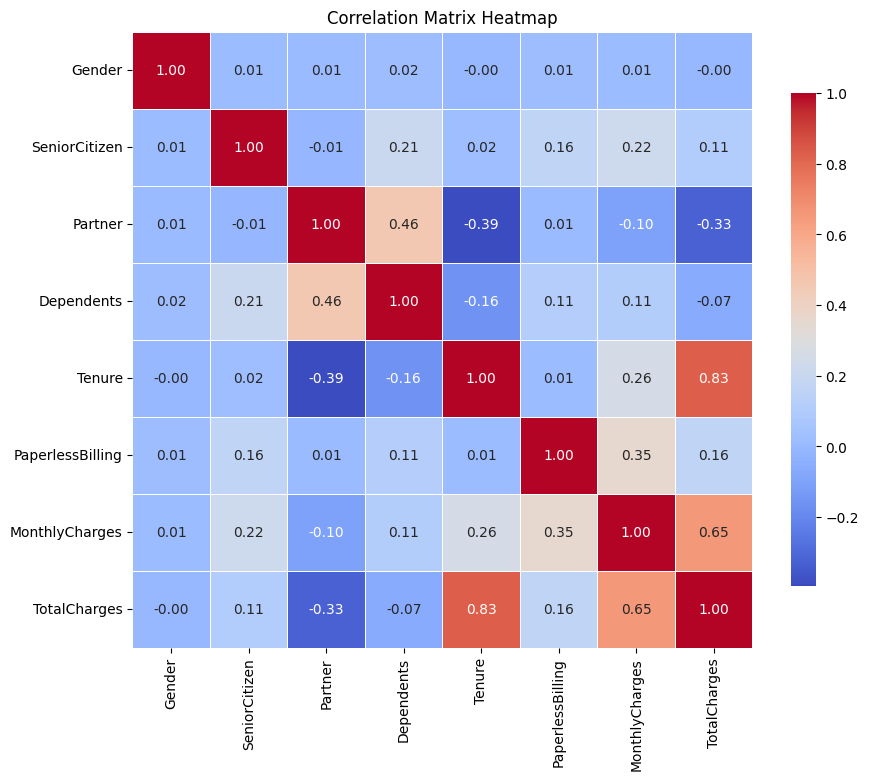

VIF Data:
             Feature        VIF
0            Gender   1.892350
1     SeniorCitizen   1.315703
2           Partner   2.871747
3        Dependents   4.430625
4            Tenure   7.708285
5  PaperlessBilling   2.825333
6    MonthlyCharges   9.440217
7      TotalCharges  11.042473


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_numeric = X_train_encoded.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = X_train_numeric.corr()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Display correlation matrix and VIF data
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

# Set title and axis labels
plt.title("Correlation Matrix Heatmap")
plt.show()
print("VIF Data:\n", vif_data)



In [ ]:
# Feature selection based on VIF
# Remove features with VIF greater than 10
features_to_remove_vif = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()

# Feature selection based on correlation
# Identify highly correlated features (correlation > 0.8)
correlation_threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]  # getting the name of the column
            correlated_features.add(colname)

# Combine features to remove based on VIF and correlation
features_to_remove = set(features_to_remove_vif).union(correlated_features)

# Remove highly correlated features and features with high VIF
X_train_reduced = X_train_encoded.drop(columns=features_to_remove)
X_test_reduced = X_test_encoded.drop(columns=features_to_remove)

# Display the shape of the data after feature selection
print(f'Shape of X_train after feature selection: {X_train_reduced.shape}')
print(f'Shape of X_test after feature selection: {X_test_reduced.shape}')

Shape of X_train after feature selection: (5518, 12)
Shape of X_test after feature selection: (1380, 12)


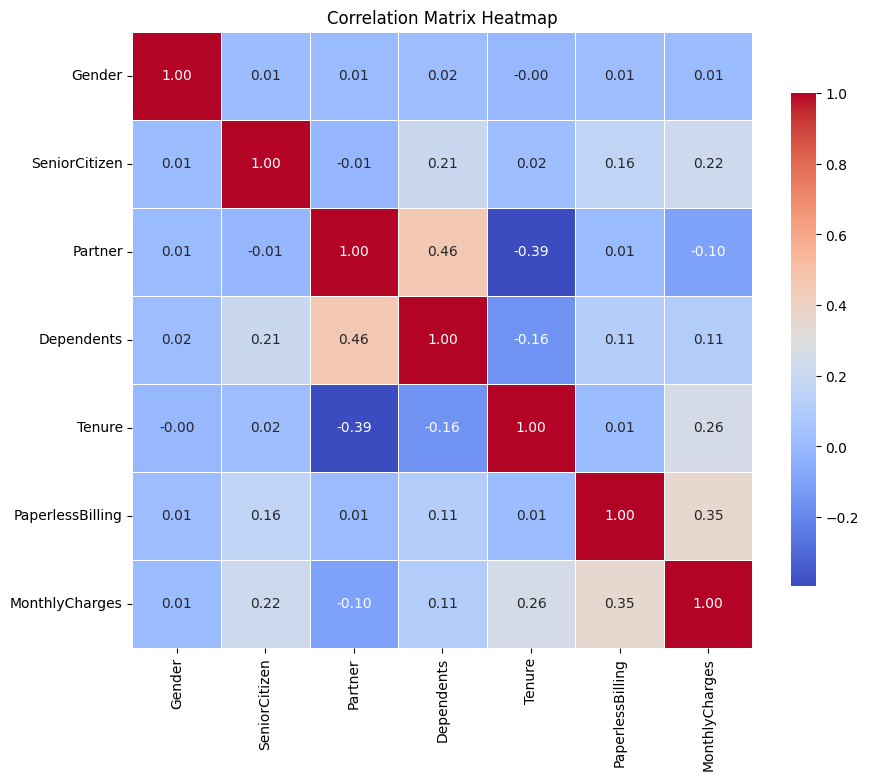

VIF Data:
             Feature       VIF
0            Gender  1.813886
1     SeniorCitizen  1.315574
2           Partner  2.709896
3        Dependents  4.316329
4            Tenure  2.816230
5  PaperlessBilling  2.785179
6    MonthlyCharges  5.867058


In [ ]:
X_train_numeric = X_train_reduced.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = X_train_numeric.corr()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Display correlation matrix and VIF data
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

# Set title and axis labels
plt.title("Correlation Matrix Heatmap")
plt.show()
print("VIF Data:\n", vif_data)


# Modelling

In [ ]:
# Convert target variable to numerical (0 and 1)
y_train = y_train.map({'No': 0, 'Yes': 1})  # Convert training target variable
y_test = y_test.map({'No': 0, 'Yes': 1})    # Convert testing target variable

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a classification model with hyperparameter tuning
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_reduced, y_train)

# Display the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.7807202359835494


In [ ]:
y_train.head()

,Churn
986,No
4599,No
1950,No
4262,Yes
6460,No


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train a classification model with hyperparameter tuning using RandomizedSearchCV
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',class_weight='balance')

# Define hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train_reduced, y_train)

# Display the best hyperparameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best Cross-Validation Score: 0.8057261487116822


# Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate the model on test data
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display accuracy and classification report
print(f'Accuracy on Test Data: {accuracy}')
print('Classification Report:\n', report)

Accuracy on Test Data: 0.7420289855072464
Classification Report:
               precision    recall  f1-score   support

          No       0.77      0.92      0.84       990
         Yes       0.58      0.30      0.40       390

    accuracy                           0.74      1380
   macro avg       0.68      0.61      0.62      1380
weighted avg       0.72      0.74      0.71      1380



# **Model Evaluation Report**

## **1. Overall Accuracy**
- **Accuracy on Test Data:** 74.2%  
  - **Interpretasi:** Dari total prediksi pada data test, **74.2%** prediksi model adalah benar.

---

## **2. Classification Metrics**

### **Class: No**
- **Precision:** 0.77  
  - Dari semua prediksi model yang mengatakan "No", **77%** adalah benar.  
- **Recall:** 0.92  
  - Dari semua data sebenarnya yang termasuk "No", model berhasil memprediksi **92%** dengan benar.  
- **F1-Score:** 0.84  
  - Keseimbangan antara precision dan recall sangat baik untuk kelas "No".

---

### **Class: Yes**
- **Precision:** 0.58  
  - Dari semua prediksi model yang mengatakan "Yes", hanya **58%** yang benar.  
- **Recall:** 0.30  
  - Dari semua data sebenarnya yang termasuk "Yes", model hanya memprediksi **30%** dengan benar.  
- **F1-Score:** 0.40  
  - Kinerja buruk untuk mendeteksi kelas "Yes" karena rendahnya recall.

---

## **3. Average Metrics**
- **Macro Average:**
  - **Precision:** 0.68  
  - **Recall:** 0.61  
  - **F1-Score:** 0.62  
  - **Interpretasi:** Rata-rata metrik menunjukkan bahwa model kesulitan menangani kelas minoritas ("Yes").  
- **Weighted Average:**
  - **Precision:** 0.72  
  - **Recall:** 0.74  
  - **F1-Score:** 0.73  
  - **Interpretasi:** Weighted average memperhitungkan proporsi data, memberikan gambaran performa yang lebih baik pada kelas mayoritas ("No").

---

## **4. Data Distribution**
- **Support (Jumlah Data per Kelas):**
  - "No": 998  
  - "Yes": 390  
  - **Interpretasi:** Dataset sangat tidak seimbang, dengan kelas "No" mendominasi.

---

## **5. Key Observations**
- Model memiliki performa sangat baik dalam mendeteksi kelas "No", tetapi kesulitan dalam mendeteksi kelas "Yes".  
- Recall rendah pada kelas "Yes" menunjukkan bahwa model sering gagal menangkap data "Yes" (**high false negatives**).  
- Ketidakseimbangan data sangat memengaruhi performa model, membuat prediksi lebih bias terhadap kelas mayoritas.



In [ ]:
# Evaluate the model on test data
# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display accuracy and classification report
print(f'Accuracy on Test Data: {accuracy}')
print('Classification Report:\n', report)

Accuracy on Test Data: 0.7782608695652173
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       990
           1       0.74      0.33      0.46       390

    accuracy                           0.78      1380
   macro avg       0.76      0.64      0.66      1380
weighted avg       0.77      0.78      0.75      1380



In [ ]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',class_weight = 'balance')

# Fit the model
xgb_model.fit(X_train_reduced, y_train)

# Step 9: Evaluate the model on test data
# Use the model to make predictions
y_pred = xgb_model.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display accuracy and classification report
print(f'Accuracy on Test Data: {accuracy}')
print('Classification Report:\n', report)

Accuracy on Test Data: 0.7427536231884058
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       990
           1       0.58      0.33      0.42       390

    accuracy                           0.74      1380
   macro avg       0.68      0.62      0.63      1380
weighted avg       0.72      0.74      0.72      1380



Interpretasi hasil :